<a href="https://colab.research.google.com/github/AndresPautrat/Topicos_UPC/blob/main/ortools_ValidateColum_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools

     |████████████████████████████████| 28.9MB 151kB/s 
     |████████████████████████████████| 1.3MB 42.6MB/s 
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


All solutions

In [ ]:
from ortools.sat.python import cp_model

class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            print('%s=%i' % (v, self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count

model = cp_model.CpModel()

#Variables
x = model.NewIntVar(0, 3, "x")
y = model.NewIntVar(0, 3, "y")
z = model.NewIntVar(0, 3, "z")

#Constraints
model.Add(x < y)
#model.Add(x < y * y)
#model.Add(x < y * y)
model.Add(y == z + 1)

#solver
solver = cp_model.CpSolver()
solution_printer = VarArraySolutionPrinter([x,y,z])

status = solver.SearchForAllSolutions(model, solution_printer)

print("# Solutions: ", solution_printer.solution_count())

x=0 y=1 z=0 
x=0 y=3 z=2 
x=1 y=3 z=2 
x=2 y=3 z=2 
x=0 y=2 z=1 
x=1 y=2 z=1 
# Solutions:  6


Optimization

CSP = {X,D,C}

COP = {X,D,C,f}


In [ ]:
model2 = cp_model.CpModel()

#variables
a = model2.NewIntVar(0,10,"a")
b = model2.NewIntVar(0,10,"b")
c = model2.NewIntVar(0,10,"c")
d = model2.NewIntVar(0,1000,"c")

#constraints
model2.AddAllDifferent([a,b,c,d])
#model2.Add(a < b)
#model2.Add(c > b)



#model2.Add(a = b * c)
#v1 = v2 * v3
#model2.AddMultiplicationEquality(v1,[v2,v3])


#d = (a * b) * c
##c1 = a * b
c1 = model2.NewIntVar(0,100,"c1")
model2.AddMultiplicationEquality(c1,[a,b])

##d= c1 * c = (a * b) * c
model2.AddMultiplicationEquality(d,[c1,c])


#optimization
model2.Maximize(a + b)

#heuristics
model2.AddDecisionStrategy([a,b,c], cp_model.CHOOSE_FIRST, cp_model.SELECT_MAX_VALUE)

#solver
solver2 = cp_model.CpSolver()
status2 = solver2.Solve(model2)

print(solver2.StatusName(status2))
print(solver2.ObjectiveValue())

print(solver2.Value(a),solver2.Value(b),solver2.Value(c),solver2.Value(d))

OPTIMAL
19.0
10 9 1 90


Reification

In [ ]:
model = cp_model.CpModel()
# Variables
x = model.NewIntVar(0, 10, 'x')
y = model.NewIntVar(0, 10, 'y')
#variable booleana intermedia para verificar una columna
b = model.NewBoolVar('b')
#Reification

## x <==> y     ====  x => y and not(y) => not(x)
## b <==> (x >= 5) 
model.Add(x >= 5).OnlyEnforceIf(b)      #     b  => (x >= 5)
model.Add(x < 5).OnlyEnforceIf(b.Not()) # not(b) => (x < 5)
## b => (y == 10 - x).
model.Add(y == 10 - x).OnlyEnforceIf(b)
## not(b) => implies y == 0.
model.Add(y == 0).OnlyEnforceIf(b.Not())


# Search for x values in increasing order.
model.AddDecisionStrategy([x], cp_model.CHOOSE_FIRST, cp_model.SELECT_MIN_VALUE)
# Search and print out all solutions.
solution_printer = VarArraySolutionPrinter([x, y, b])
solver.SearchForAllSolutions(model, solution_printer)

x=5 y=5 b=1 
x=6 y=4 b=1 
x=7 y=3 b=1 
x=8 y=2 b=1 
x=9 y=1 b=1 
x=10 y=0 b=1 
x=0 y=0 b=0 
x=1 y=0 b=0 
x=2 y=0 b=0 
x=3 y=0 b=0 
x=4 y=0 b=0 


4

Graph coloring with optimization

In [ ]:
from random import *
def generarGrafo(n,m):
  g = [[] for i in range(n)]
  for i in range(m):
    v1 = randint(0,n-1)
    v2 = randint(0,n-1)    
    while v2 in g[v1] or v1 in g[v2] or v1 == v2:
      v1 = randint(0,n-1)
      v2 = randint(0,n-1)
    g[v1] += [v2]
    g[v2] += [v1]
  return g
n = 10
m = 15
g = generarGrafo(n,m)
colors = [(random(), random(), random()) for _i in range(n)]
print(g)

[[7, 3, 8, 2], [8, 4], [6, 9, 0], [6, 0, 4, 7, 5], [9, 3, 1], [6, 8, 3], [3, 5, 2], [0, 3], [5, 0, 1], [4, 2]]


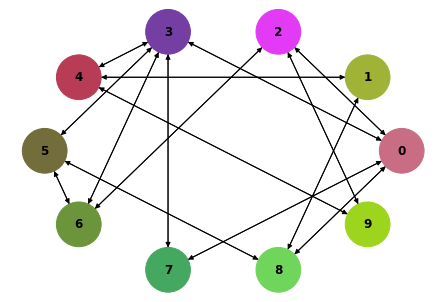

In [ ]:
import networkx as nx
def dibujarGrafoConPesos(grafo,colors):    
    G = nx.DiGraph()
    for i in range(len(grafo)):
        G.add_node(i)
    for v1 in range(len(grafo)):
        for v2 in grafo[v1]:
            G.add_edge(v1, v2)
    nx.draw_circular(G, with_labels=True, font_weight='bold', node_size=2000,node_color=colors)
    #labels = nx.get_edge_attributes(G,'weight')
    #nx.draw_networkx_edge_labels(G,pos=nx.circular_layout(G),edge_labels=labels)
dibujarGrafoConPesos(g,colors)

Nodo 0 de color 3
Nodo 1 de color 5
Nodo 2 de color 4
Nodo 3 de color 1
Nodo 4 de color 6
Nodo 5 de color 6
Nodo 6 de color 5
Nodo 7 de color 2
Nodo 8 de color 4
Nodo 9 de color 1


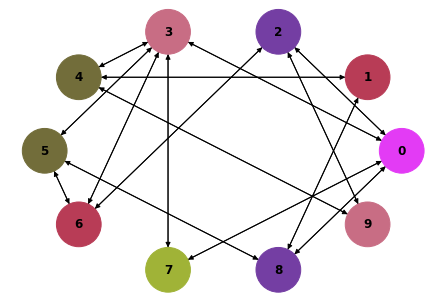

In [ ]:
from ortools.sat.python import cp_model

numeroColores = 10

#colors = [(random(), random(), random()) for _i in range(numeroColores)]

model4 = cp_model.CpModel()
#variables and domains

##variables de nodos
color = []
for i in range(len(g)):
  color += [model4.NewIntVar(1, numeroColores, "nodo"+str(i))]

#constraints
for v1 in range(len(g)):
  for v2 in g[v1]:
    model4.Add(color[v1] != color[v2])

solver4 = cp_model.CpSolver()
status4 = solver4.Solve(model4)
if status4 == cp_model.FEASIBLE:
  colors1 = []
  for v1 in range(len(g)):
    print("Nodo",v1,"de color",solver4.Value(color[v1]))
    colors1 += [colors[solver4.Value(color[v1]) - 1]]    
  dibujarGrafoConPesos(g,colors1)

Nodo 0 de color 10
Nodo 1 de color 10
Nodo 2 de color 8
Nodo 3 de color 8
Nodo 4 de color 9
Nodo 5 de color 10
Nodo 6 de color 9
Nodo 7 de color 9
Nodo 8 de color 9
Nodo 9 de color 10
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 1 0 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 1 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 1 1 1 
3


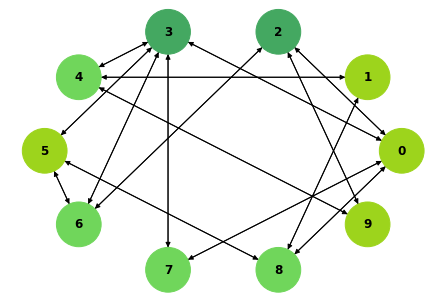

In [ ]:
from ortools.sat.python import cp_model

model4 = cp_model.CpModel()
#variables and domains

##variables de uso de color
usedcolor = []
for i in range(len(g)):
  fila = []
  for j in range(numeroColores):
    fila += [model4.NewBoolVar("usedcolor" + str(i) + str(j))]
  #print(fila)
  usedcolor += [fila]

##variables de nodos
color = []
for i in range(len(g)):
  color += [model4.NewIntVar(1, numeroColores, "nodo"+str(i))]
  for j in range(numeroColores):# 0 .. numeroColores -1
    #usedcolor[i][j] <==> (ci == j + 1)
    #print(color[i], j + 1, usedcolor[i][j],end=" | ")
    model4.Add(color[i] == j + 1).OnlyEnforceIf(usedcolor[i][j])
    model4.Add(color[i] != j + 1).OnlyEnforceIf(usedcolor[i][j].Not())
  #print()

columnascolor = []
for j in range(numeroColores):
  columnascolor += [model4.NewBoolVar("colcolor"+str(j))]
  columna = []
  for i in range(len(g)):
    columna += [usedcolor[i][j]]
  #
  model4.Add(sum(columna) > 0).OnlyEnforceIf(columnascolor[j])
  model4.Add(sum(columna) == 0).OnlyEnforceIf(columnascolor[j].Not())

#constraints
##cantidad colores
cantidadColores = model4.NewIntVar(1, numeroColores, "cantidad")
model4.Add(cantidadColores == sum(columnascolor))

##vecinos con colores distintos
for v1 in range(len(g)):
  for v2 in g[v1]:
    model4.Add(color[v1] != color[v2])

#optimization
model4.Minimize(cantidadColores)

#solver
solver4 = cp_model.CpSolver()
status4 = solver4.Solve(model4)
if status4 == cp_model.OPTIMAL:
  colors1 = []
  for v1 in range(len(g)):
    print("Nodo",v1,"de color",solver4.Value(color[v1]))
    colors1 += [colors[solver4.Value(color[v1]) - 1]]
  dibujarGrafoConPesos(g,colors1)
  for i in range(len(g)):
    for j in range(numeroColores):
      print(solver4.Value(usedcolor[i][j]),end=" ")
    print()
  print("========")
  for j in range(numeroColores):
    print(solver4.Value(columnascolor[j]),end=" ")
  print()
  print(solver4.Value(cantidadColores))